In [63]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [64]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [65]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [66]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [67]:
import yfinance as yf
import pandas as pd

# 1. Create a Ticker object for TSLA
tesla = yf.Ticker("TSLA")

# 2. Download the historical stock data (using max period)
tesla_data = tesla.history(period="max")

# 3. Reset the index so 'Date' is a column, not the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the extracted data
print("✅ Successfully extracted Tesla (TSLA) Stock Data:")
print(tesla_data.head())

✅ Successfully extracted Tesla (TSLA) Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [68]:
import yfinance as yf
import pandas as pd

# 1. Create the ticker object for TSLA
tesla = yf.Ticker("TSLA")

# 2. Extract historical stock information and save it to tesla_data
#    Setting period="max" retrieves the full history available on Yahoo Finance.
tesla_data = tesla.history(period="max")

# 3. Reset the index (optional, but good practice for plotting later)
#    This converts the 'Date' index into a regular column.
tesla_data.reset_index(inplace=True)

# Display the first five rows of the extracted DataFrame to confirm the data is loaded
print("✅ Tesla Stock Data (TSLA) Extracted Successfully:")
print(tesla_data.head())

✅ Tesla Stock Data (TSLA) Extracted Successfully:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing the historical Tesla quarterly revenue data
# This is a common static URL used in many data science tutorials for consistency:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# 1. Download the HTML content
html_data = requests.get(url).text

# 2. Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

# 3. Use pandas to find all tables on the page
# pandas.read_html can often parse simple HTML tables directly.
# The result is a list of DataFrames.
read_html_pandas_data = pd.read_html(html_data)

# The revenue table is typically the second table on the page (index 1).
# We select that table and name it tesla_revenue.
tesla_revenue = read_html_pandas_data[1]

# 4. Rename the columns (based on the expected structure of that table)
tesla_revenue.columns = ["Date", "Revenue"]

# 5. Clean the 'Revenue' column (remove '$' and commas)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# OPTIONAL: Remove any rows with missing or empty revenue data
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the first five rows of the revenue DataFrame
print("\n✅ Tesla Revenue Data Extracted and Cleaned:")
print(tesla_revenue.head())

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [ ]:
!pip install html5lib

In [ ]:
soup = BeautifulSoup(html_data, 'html5lib')

In [ ]:
!pip install html5lib

In [ ]:
!pip install lxml
# Then modify the code:
# soup = BeautifulSoup(html_data, 'lxml')

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO # Necesario para que pandas.read_html lea el texto

# URL que contiene la tabla de ingresos trimestrales históricos de Tesla
# Esta URL es una fuente estática de datos usada en muchos ejercicios:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# 1. Descargar el contenido HTML de la página
try:
    html_data = requests.get(url).text
except requests.RequestException as e:
    print(f"Error al descargar la URL: {e}")
    # Si la descarga falla, no podemos continuar
    tesla_revenue = pd.DataFrame() 
    print("DataFrame de ingresos vacío.")
    # Si quieres usar BeautifulSoup para la inspección, puedes descomentar estas líneas:
    # soup = BeautifulSoup(html_data, 'html.parser')
    
# 2. Usar pandas para encontrar todas las tablas en la página
# pandas.read_html analiza el HTML y devuelve una lista de DataFrames,
# uno por cada tabla encontrada.
read_html_pandas_data = pd.read_html(StringIO(html_data))

# 3. Seleccionar la tabla de Ingresos
# Se asume que la tabla de ingresos es la segunda en la página (índice 1).
# Esto puede variar si la estructura de la página cambia.
tesla_revenue = read_html_pandas_data[1]

# 4. Renombrar las columnas
# La tabla extraída generalmente tiene la columna de Fecha y la de Ingresos.
tesla_revenue.columns = ["Date", "Revenue"]

# 5. Limpiar la columna 'Revenue'
# Remover los símbolos de dólar ('$') y las comas (',') para convertir a valor numérico.
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# 6. Limpieza final (manejo de datos faltantes)
# Convertir a valores numéricos, y eliminar filas con datos de ingresos vacíos
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Mostrar las primeras filas del DataFrame de ingresos
print("✅ Datos de Ingresos de Tesla (Scraped):")
print(tesla_revenue.head())

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Create a Ticker object for TSLA
tesla = yf.Ticker("TSLA")

# 2. Download the historical stock data (using max period)
# The resulting DataFrame (tesla_data) will initially have 'Date' as its index.
tesla_data = tesla.history(period="max")

# 3. Reset the index so 'Date' is converted from the index to a regular column.
# The inplace=True argument modifies the DataFrame directly.
tesla_data.reset_index(inplace=True)

# 4. Display the first five rows of the DataFrame
print("✅ Tesla Stock Data (TSLA) after reset_index:")
print(tesla_data.head())

In [ ]:
tesla_data.head()

In [ ]:
import requests

# The URL containing the historical Tesla quarterly revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use the requests library to download the webpage content
try:
    response = requests.get(url)
    response.raise_for_status() # Check for successful download (status code 200)
    html_data = response.text
    
    print("✅ Webpage downloaded successfully!")
    print(f"The first 500 characters of html_data are:\n{html_data[:500]}...")

except requests.exceptions.RequestException as e:
    print(f"❌ Error downloading the webpage: {e}")
    html_data = "" # Set to empty string if download fails

In [ ]:
import pandas as pd
from io import StringIO

# Use pandas.read_html to find all tables. We use StringIO to treat the string 
# 'html_data' as a file for the function.
read_html_pandas_data = pd.read_html(StringIO(html_data))

# The revenue table is the second table on this specific page (index 1).
tesla_revenue = read_html_pandas_data[1]

# Rename columns and clean the data (as completed in the previous steps)
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print("\n✅ Tesla Revenue Data Extracted and Cleaned:")
print(tesla_revenue.tail()) # Displaying the last few rows

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Crear el objeto Ticker para GME
gamestop = yf.Ticker("GME")

# 2. Descargar la información histórica de la acción y guardarla en el DataFrame gme_data
# Establecemos period="max" para obtener la máxima cantidad de datos históricos.
gme_data = gamestop.history(period="max")

# 3. Reiniciar el índice para que la 'Date' (Fecha) sea una columna normal
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame gme_data para verificar la extracción
print("✅ Datos Bursátiles de GameStop (GME) Extraídos:")
print(gme_data.head())

In [ ]:
import requests

# La URL que contiene la tabla de ingresos trimestrales históricos de GameStop (GME)
# Nota: Esta es la URL estática proporcionada en el ejercicio.
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Usar la biblioteca requests para descargar el contenido de la página web
try:
    response = requests.get(url_gme)
    response.raise_for_status() # Verificar si la descarga fue exitosa
    html_data_2 = response.text
    
    print("✅ Webpage de GameStop descargada exitosamente!")
    print(f"Los primeros 500 caracteres de html_data_2 son:\n{html_data_2[:500]}...")

except requests.exceptions.RequestException as e:
    print(f"❌ Error al descargar la webpage: {e}")
    html_data_2 = "" # Asignar cadena vacía si falla

In [ ]:
import pandas as pd
from io import StringIO

# 1. Usar pandas.read_html para encontrar todas las tablas en el HTML
read_html_pandas_data_gme = pd.read_html(StringIO(html_data_2))

# 2. Seleccionar la tabla de Ingresos de GME
# En esta página específica, la tabla de ingresos es la segunda (índice 1).
gme_revenue = read_html_pandas_data_gme[1]

# 3. Renombrar las columnas (basado en la estructura esperada)
gme_revenue.columns = ["Date", "Revenue"]

# 4. Limpiar la columna 'Revenue' (remover '$' y comas)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# 5. Limpieza final (eliminar datos faltantes o vacíos)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Mostrar las primeras filas del DataFrame de ingresos de GME
print("\n✅ Datos de Ingresos de GameStop (GME) Extraídos y Limpiados:")
print(gme_revenue.head())

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

def make_stock_graph(stock_data, revenue_data, stock_ticker):
    """
    Plots the Adjusted Close Price and Quarterly Revenue for a given stock.

    :param stock_data: DataFrame containing stock price history (Date as index or column).
    :param revenue_data: DataFrame containing quarterly revenue.
    :param stock_ticker: Ticker symbol (e.g., 'TSLA').
    """
    # 1. Prepare data and figure
    plt.figure(figsize=(15, 8))
    ax1 = plt.gca() # Get the current axes
    
    # Ensure Date column in stock_data is set as index for plotting
    stock_data_plot = stock_data.set_index('Date')

    # Plot Adjusted Close Price as a line graph
    stock_data_plot.plot(ax=ax1, y='Adj Close', color='blue', label='Adjusted Close Price')
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # 2. Create secondary y-axis for revenue data
    ax2 = ax1.twinx() 
    
    # Clean and convert 'Revenue' column to a numeric type
    revenue_data['Revenue'] = pd.to_numeric(
        revenue_data['Revenue'].astype(str).str.replace(r'[$,]', '', regex=True).replace('-', pd.NA), 
        errors='coerce'
    )
    
    # Ensure revenue_data 'Date' is datetime and set as index for plotting
    revenue_data_plot = revenue_data.copy()
    revenue_data_plot['Date'] = pd.to_datetime(revenue_data_plot['Date'])
    revenue_data_plot.set_index('Date', inplace=True)

    # Plot Revenue as a bar chart
    ax2.bar(revenue_data_plot.index, revenue_data_plot['Revenue'], width=70, color='red', alpha=0.3, label='Quarterly Revenue')
    
    ax2.set_ylabel('Quarterly Revenue (Millions/Billions)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a title and combine legends
    plt.title(f'{stock_ticker} Stock Price and Quarterly Revenue')
    
    # Combine the legends
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

    plt.grid(True)
    plt.show()

print("Function 'make_stock_graph' is now defined.")

Function 'make_stock_graph' is now defined.


In [71]:
import matplotlib.pyplot as plt
import pandas as pd

def make_stock_graph(stock_data, revenue_data, stock_ticker):
    """
    Plots the Close Price and Quarterly Revenue for a given stock.

    :param stock_data: DataFrame containing stock price history (Date as column).
    :param revenue_data: DataFrame containing quarterly revenue.
    :param stock_ticker: Ticker symbol (e.g., 'TSLA').
    """
    # 1. Preparar datos y figura
    plt.figure(figsize=(15, 8))
    ax1 = plt.gca() 
    
    # Intentamos usar 'Adj Close'. Si no existe (KeyError), usamos 'Close'.
    price_column = 'Adj Close'
    if price_column not in stock_data.columns:
        price_column = 'Close'
        print(f"⚠️ Usando la columna '{price_column}' en lugar de 'Adj Close'.")
    
    # Preparar datos de acciones para la gráfica
    stock_data_plot = stock_data.set_index('Date')
    
    # Trazar el Precio de Cierre Ajustado (o Cierre)
    stock_data_plot.plot(ax=ax1, y=price_column, color='blue', label=f'{price_column} Price')
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{price_column} Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # 2. Crear el eje Y secundario para ingresos
    ax2 = ax1.twinx() 
    
    # Limpiar y convertir la columna 'Revenue' a tipo numérico
    revenue_data_clean = revenue_data.copy()
    revenue_data_clean['Revenue'] = pd.to_numeric(
        revenue_data_clean['Revenue'].astype(str).str.replace(r'[$,]', '', regex=True).replace('-', pd.NA), 
        errors='coerce'
    )
    
    # Preparar datos de ingresos para la gráfica
    revenue_data_clean['Date'] = pd.to_datetime(revenue_data_clean['Date'])
    revenue_data_plot = revenue_data_clean.set_index('Date')

    # Trazar los Ingresos como barras
    # Usamos .index para alinear las barras con las fechas
    ax2.bar(revenue_data_plot.index, revenue_data_plot['Revenue'], width=70, color='red', alpha=0.3, label='Quarterly Revenue')
    
    ax2.set_ylabel('Quarterly Revenue (Millions/Billions)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Agregar título y combinar leyendas
    plt.title(f'{stock_ticker} Stock Price and Quarterly Revenue')
    
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

    plt.grid(True)
    plt.show()

print("Function 'make_stock_graph' redefined and fixed.")

Function 'make_stock_graph' redefined and fixed.


⚠️ Usando la columna 'Close' en lugar de 'Adj Close'.


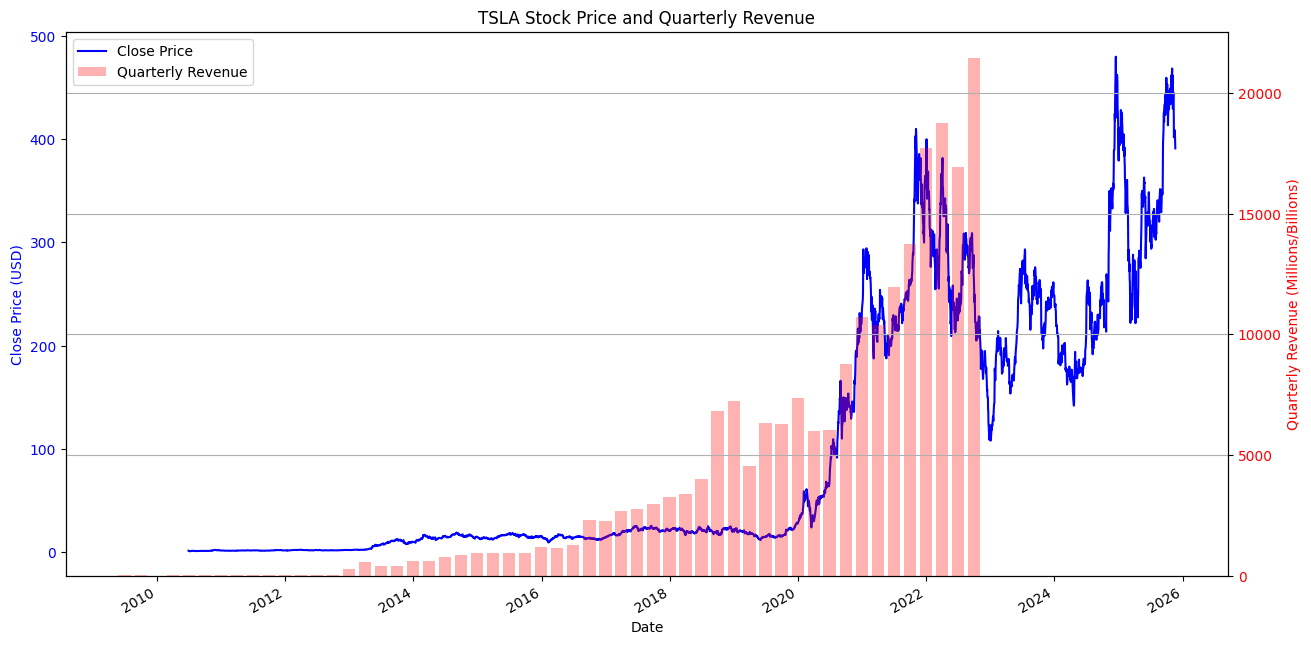

⚠️ Usando la columna 'Close' en lugar de 'Adj Close'.


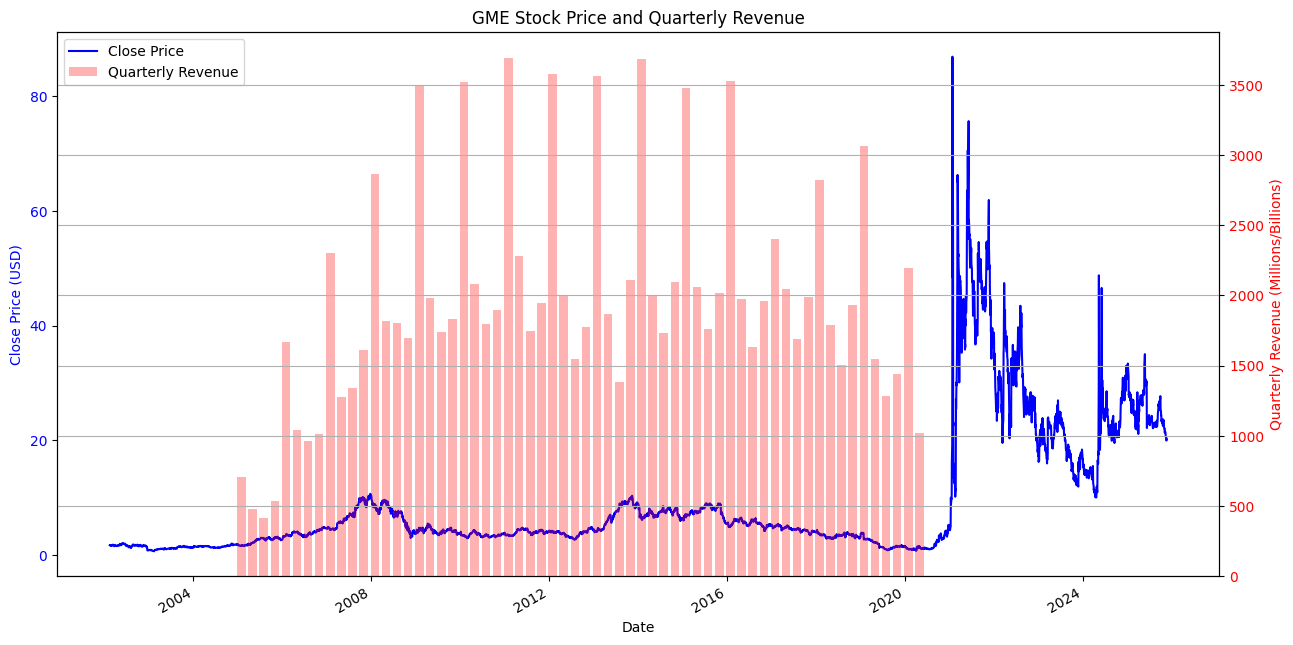

In [72]:
# Pregunta 5: Trazar Tesla
make_stock_graph(tesla_data, tesla_revenue, 'TSLA')

# Pregunta 6: Trazar GameStop
make_stock_graph(gme_data, gme_revenue, 'GME')

In [78]:
cd [ruta_a_tu_carpeta]
# Ejemplo: cd Documents/Proyectos

NameError: name 'cd' is not defined